In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
df= pd.read_csv('C:\\Users\\Hp\\Downloads\\insurance_claims.csv')

In [218]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data Pre-Processing

In [219]:
df.replace('?', np.nan, inplace = True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [221]:
isna=df.isna().sum()

In [222]:
isna=isna.to_frame(name='nan')

# Visualizing Missing Values

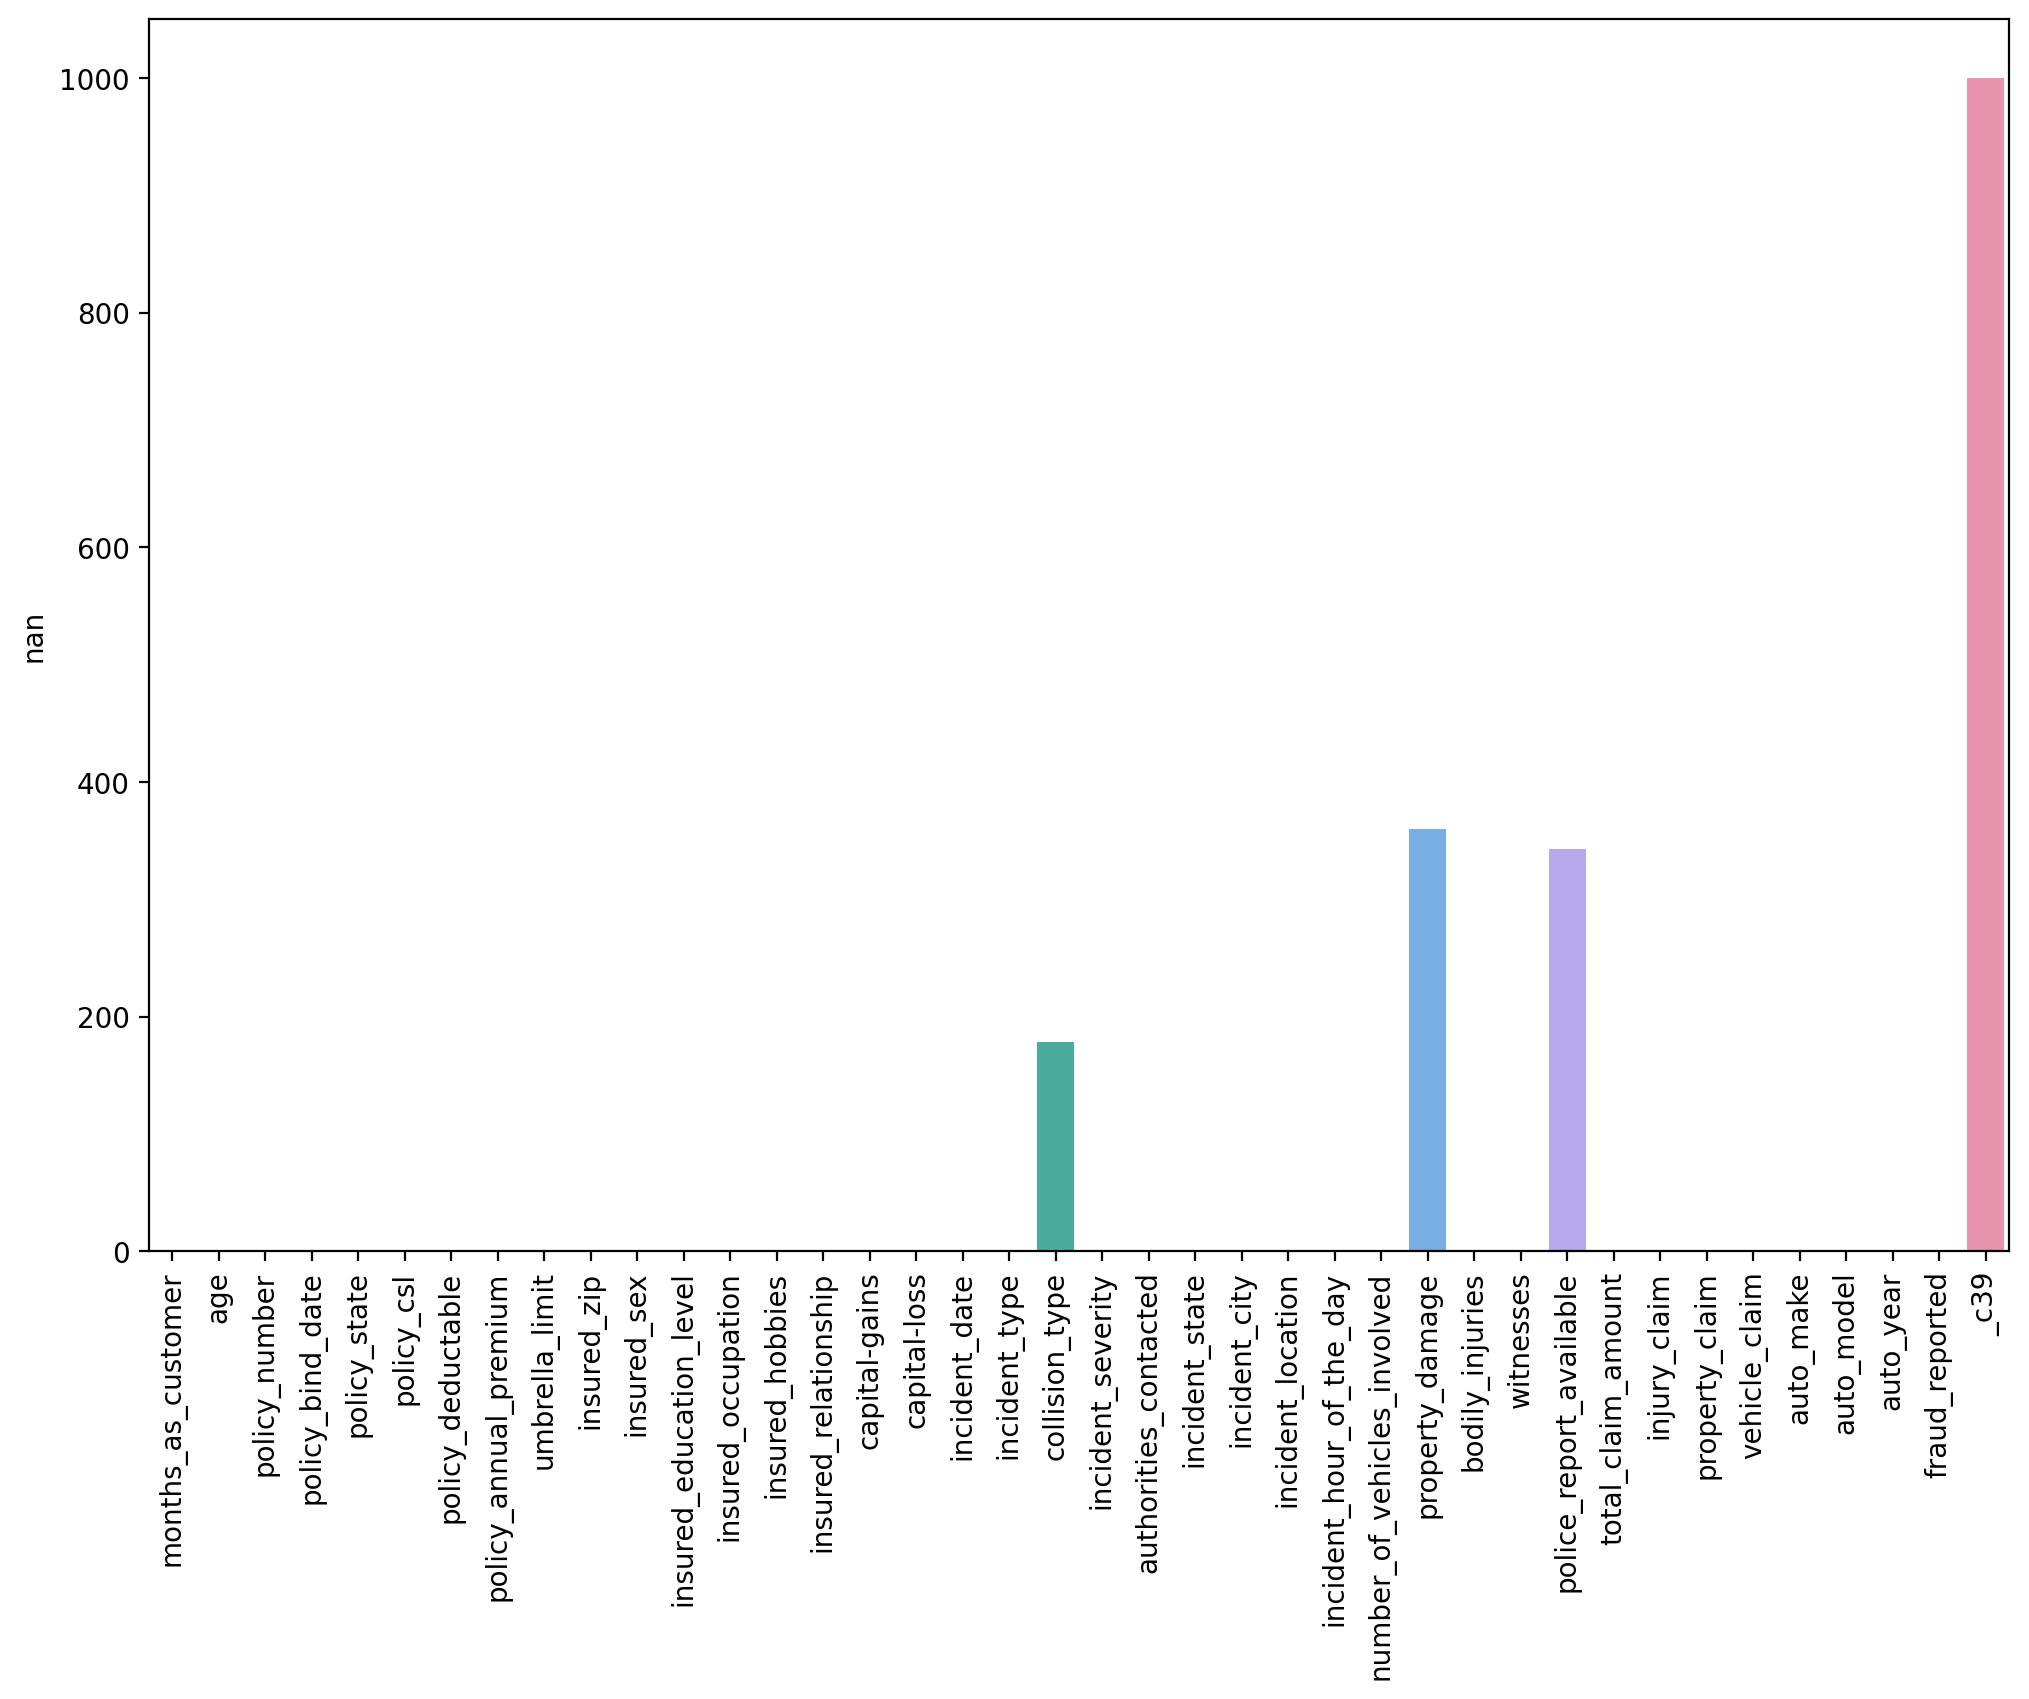

In [223]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(isna,x=isna.index,y='nan')
plt.xticks(rotation=90);

In [224]:
df=df.drop('_c39',axis=1)

In [225]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Handling missing values

In [228]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [231]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [232]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [233]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')
df['days_between_policy_incident'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [234]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

# Checking Multicollinearity

C:\Users\Hp\AppData\Local\Temp\ipykernel_3844\2802755809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),cmap='magma', annot=True);


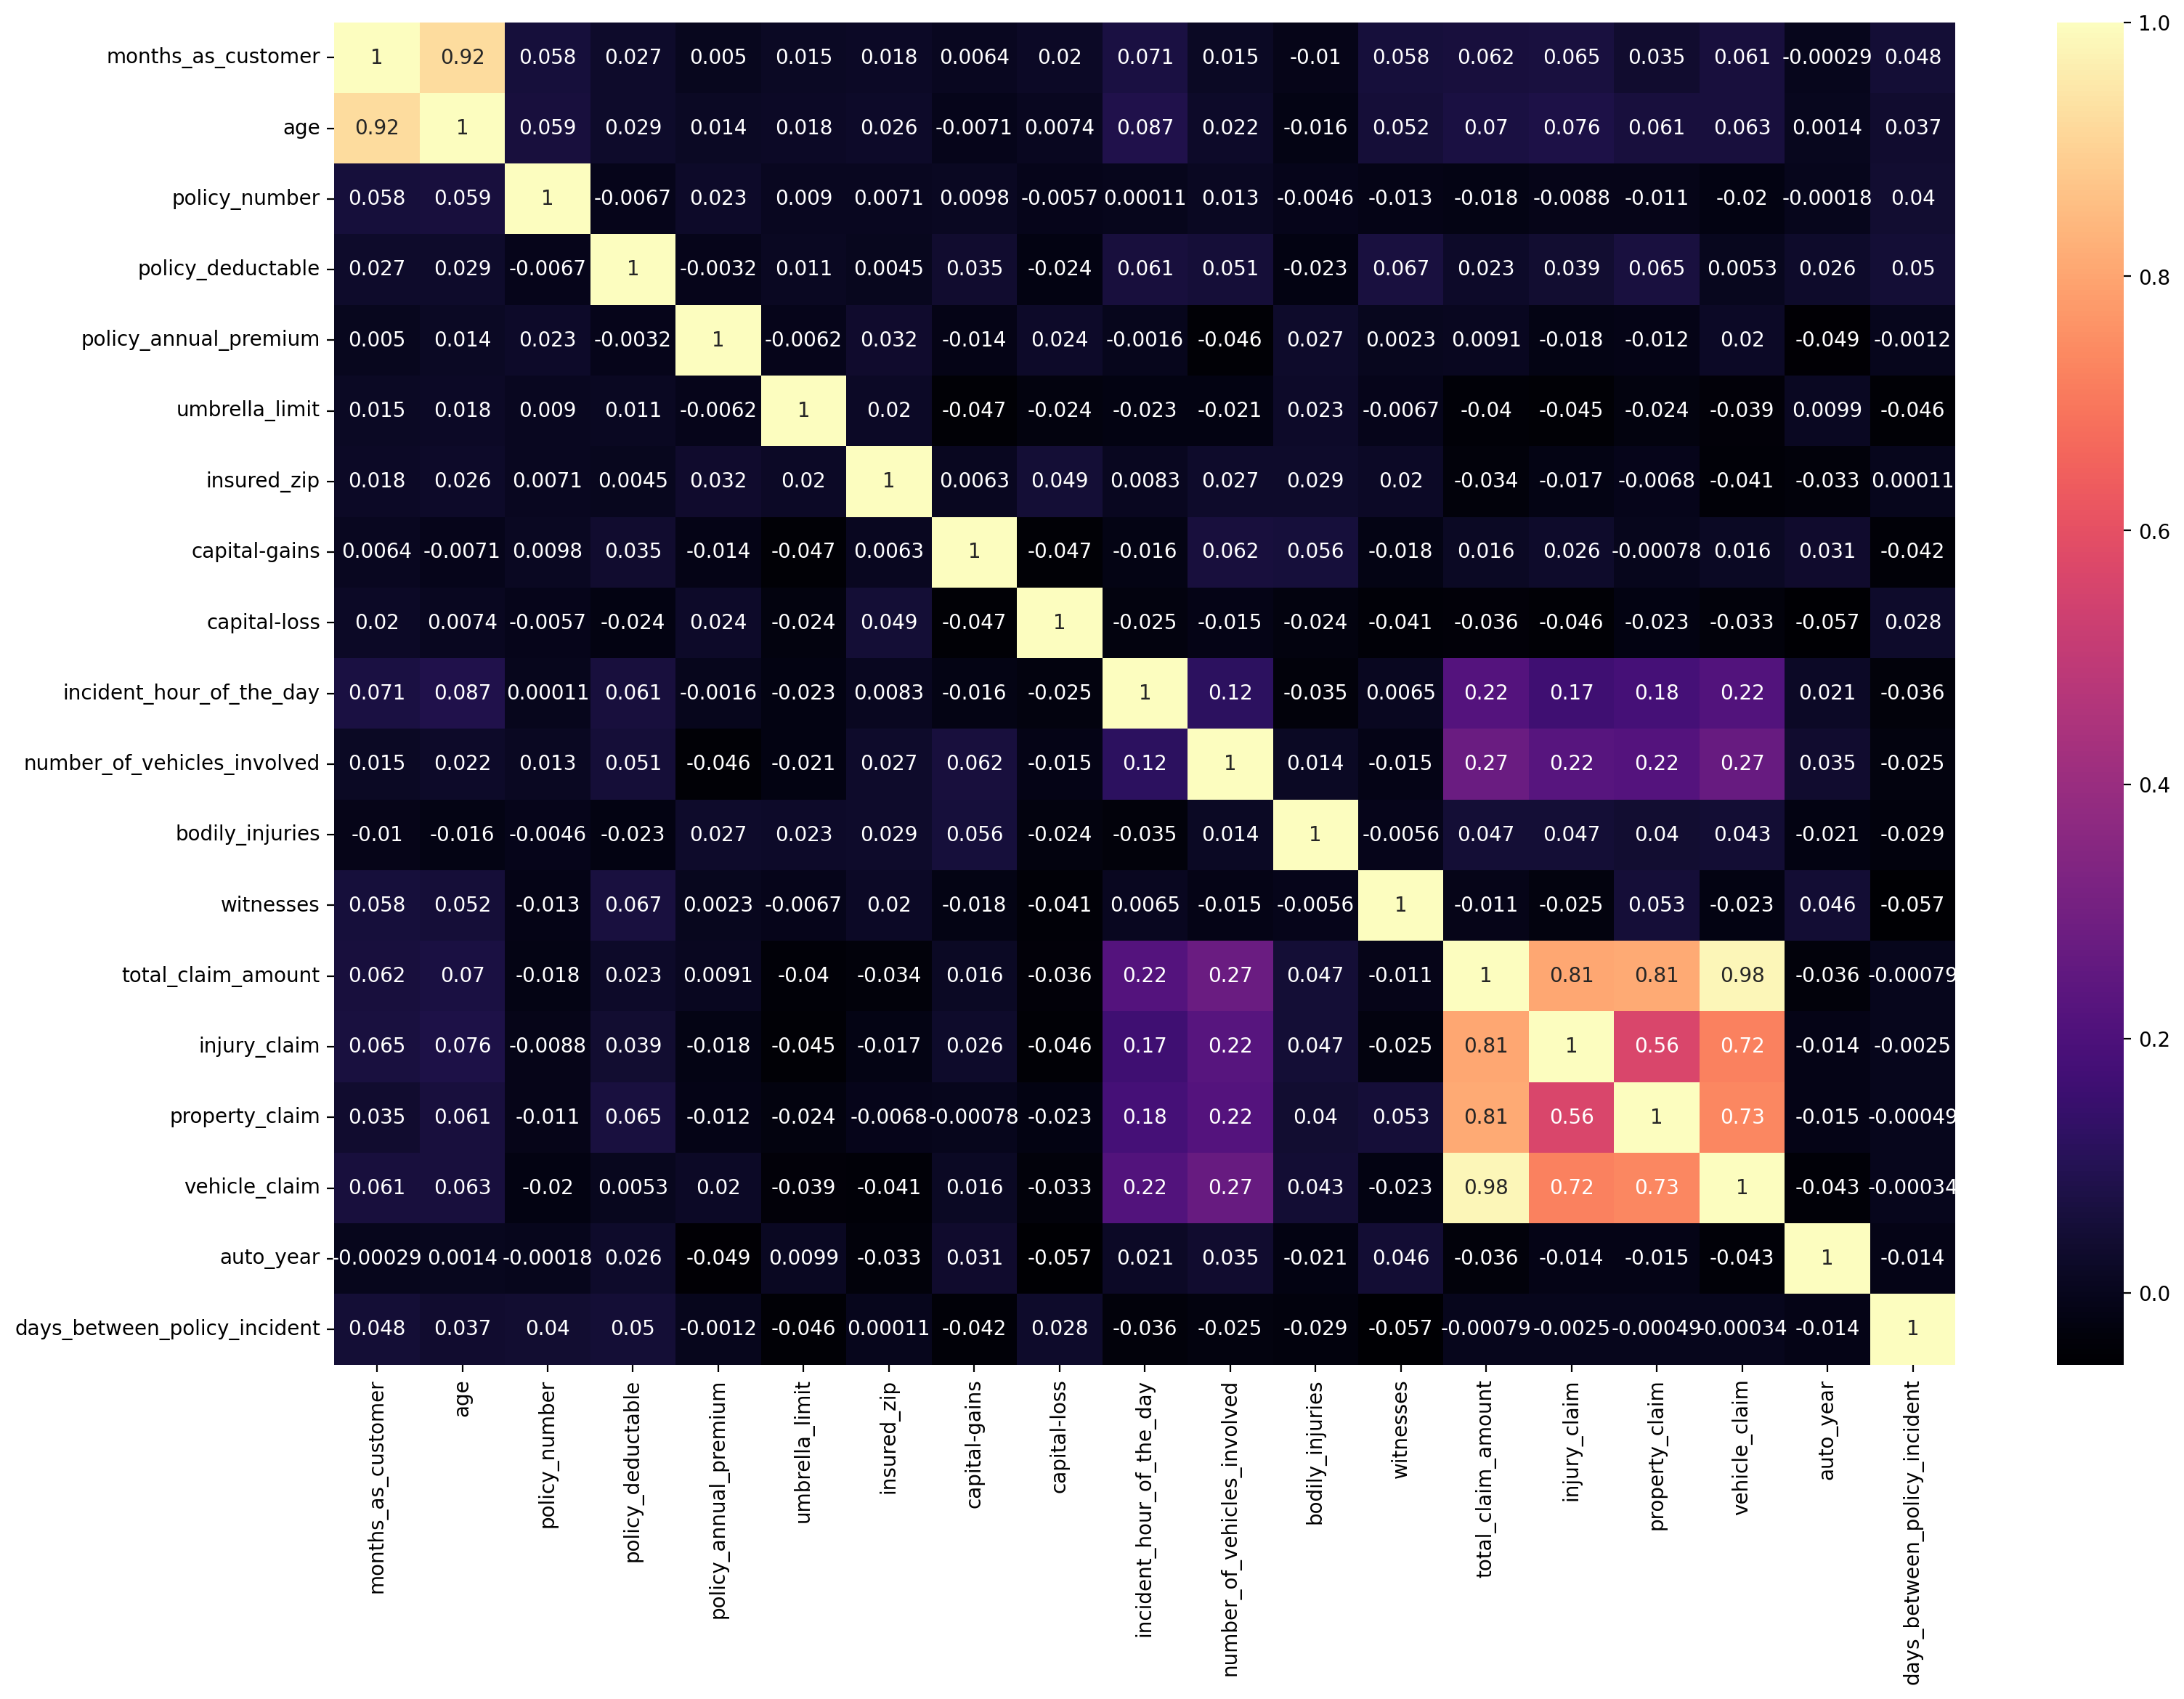

In [235]:
plt.figure(figsize=(18,12),dpi=200)
sns.heatmap(data=df.corr(),cmap='magma', annot=True);

In [236]:
df[['total_claim_amount','injury_claim','property_claim', 'vehicle_claim']]

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
...,...,...,...,...
995,87200,17440,8720,61040
996,108480,18080,18080,72320
997,67500,7500,7500,52500
998,46980,5220,5220,36540


In [237]:
df.nunique()

months_as_customer               391
age                               46
policy_number                   1000
policy_bind_date                 951
policy_state                       3
policy_csl                         3
policy_deductable                  3
policy_annual_premium            991
umbrella_limit                    11
insured_zip                      995
insured_sex                        2
insured_education_level            7
insured_occupation                14
insured_hobbies                   20
insured_relationship               6
capital-gains                    338
capital-loss                     354
incident_date                     60
incident_type                      4
collision_type                     3
incident_severity                  4
authorities_contacted              5
incident_state                     7
incident_city                      7
incident_location               1000
incident_hour_of_the_day          24
number_of_vehicles_involved        4
p

In [238]:
drop_list=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'total_claim_amount','age','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
df.drop(drop_list, inplace = True, axis = 1)

In [239]:
df.nunique()

months_as_customer              391
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
injury_claim                    638
property_claim                  626
vehicle_claim                   726
fraud_reported                    2
days_between_policy_incident    953
dtype: int64

# Encoding Categorical columns

In [240]:
df_objects=df.select_dtypes(include=object)

In [241]:
df_objects

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NO,N
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NO,N
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,YES,N
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NO,YES,N


In [242]:
df_objects=pd.get_dummies(data=df_objects,drop_first=True)

In [243]:
df_objects.reset_index(drop=True, inplace=True)

In [244]:
df_objects

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
997,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
998,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [245]:
df_numeric=df.select_dtypes(exclude=object)

In [246]:
df_numeric

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,days_between_policy_incident
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080,100
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510,3130
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100,5282
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720,8996
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040,8622
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320,384
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500,4358
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540,1196


In [247]:
final_df=pd.concat([df_numeric,df_objects],axis=1)


In [248]:
final_df

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,0,0,0,0,0,1,1,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,1,0,0,0,0,0,1,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,1,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,...,1,0,0,1,0,0,0,1,0,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,...,0,0,0,1,0,0,0,1,0,0
997,130,500,1383.49,3000000,35100,0,4,3,2,3,...,1,0,0,0,0,0,1,0,1,0
998,458,2000,1356.92,5000000,0,0,2,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [249]:
final_df.rename(columns={'fraud_reported_Y': 'fraud_reported'}, inplace=True)

# Outliers Detection

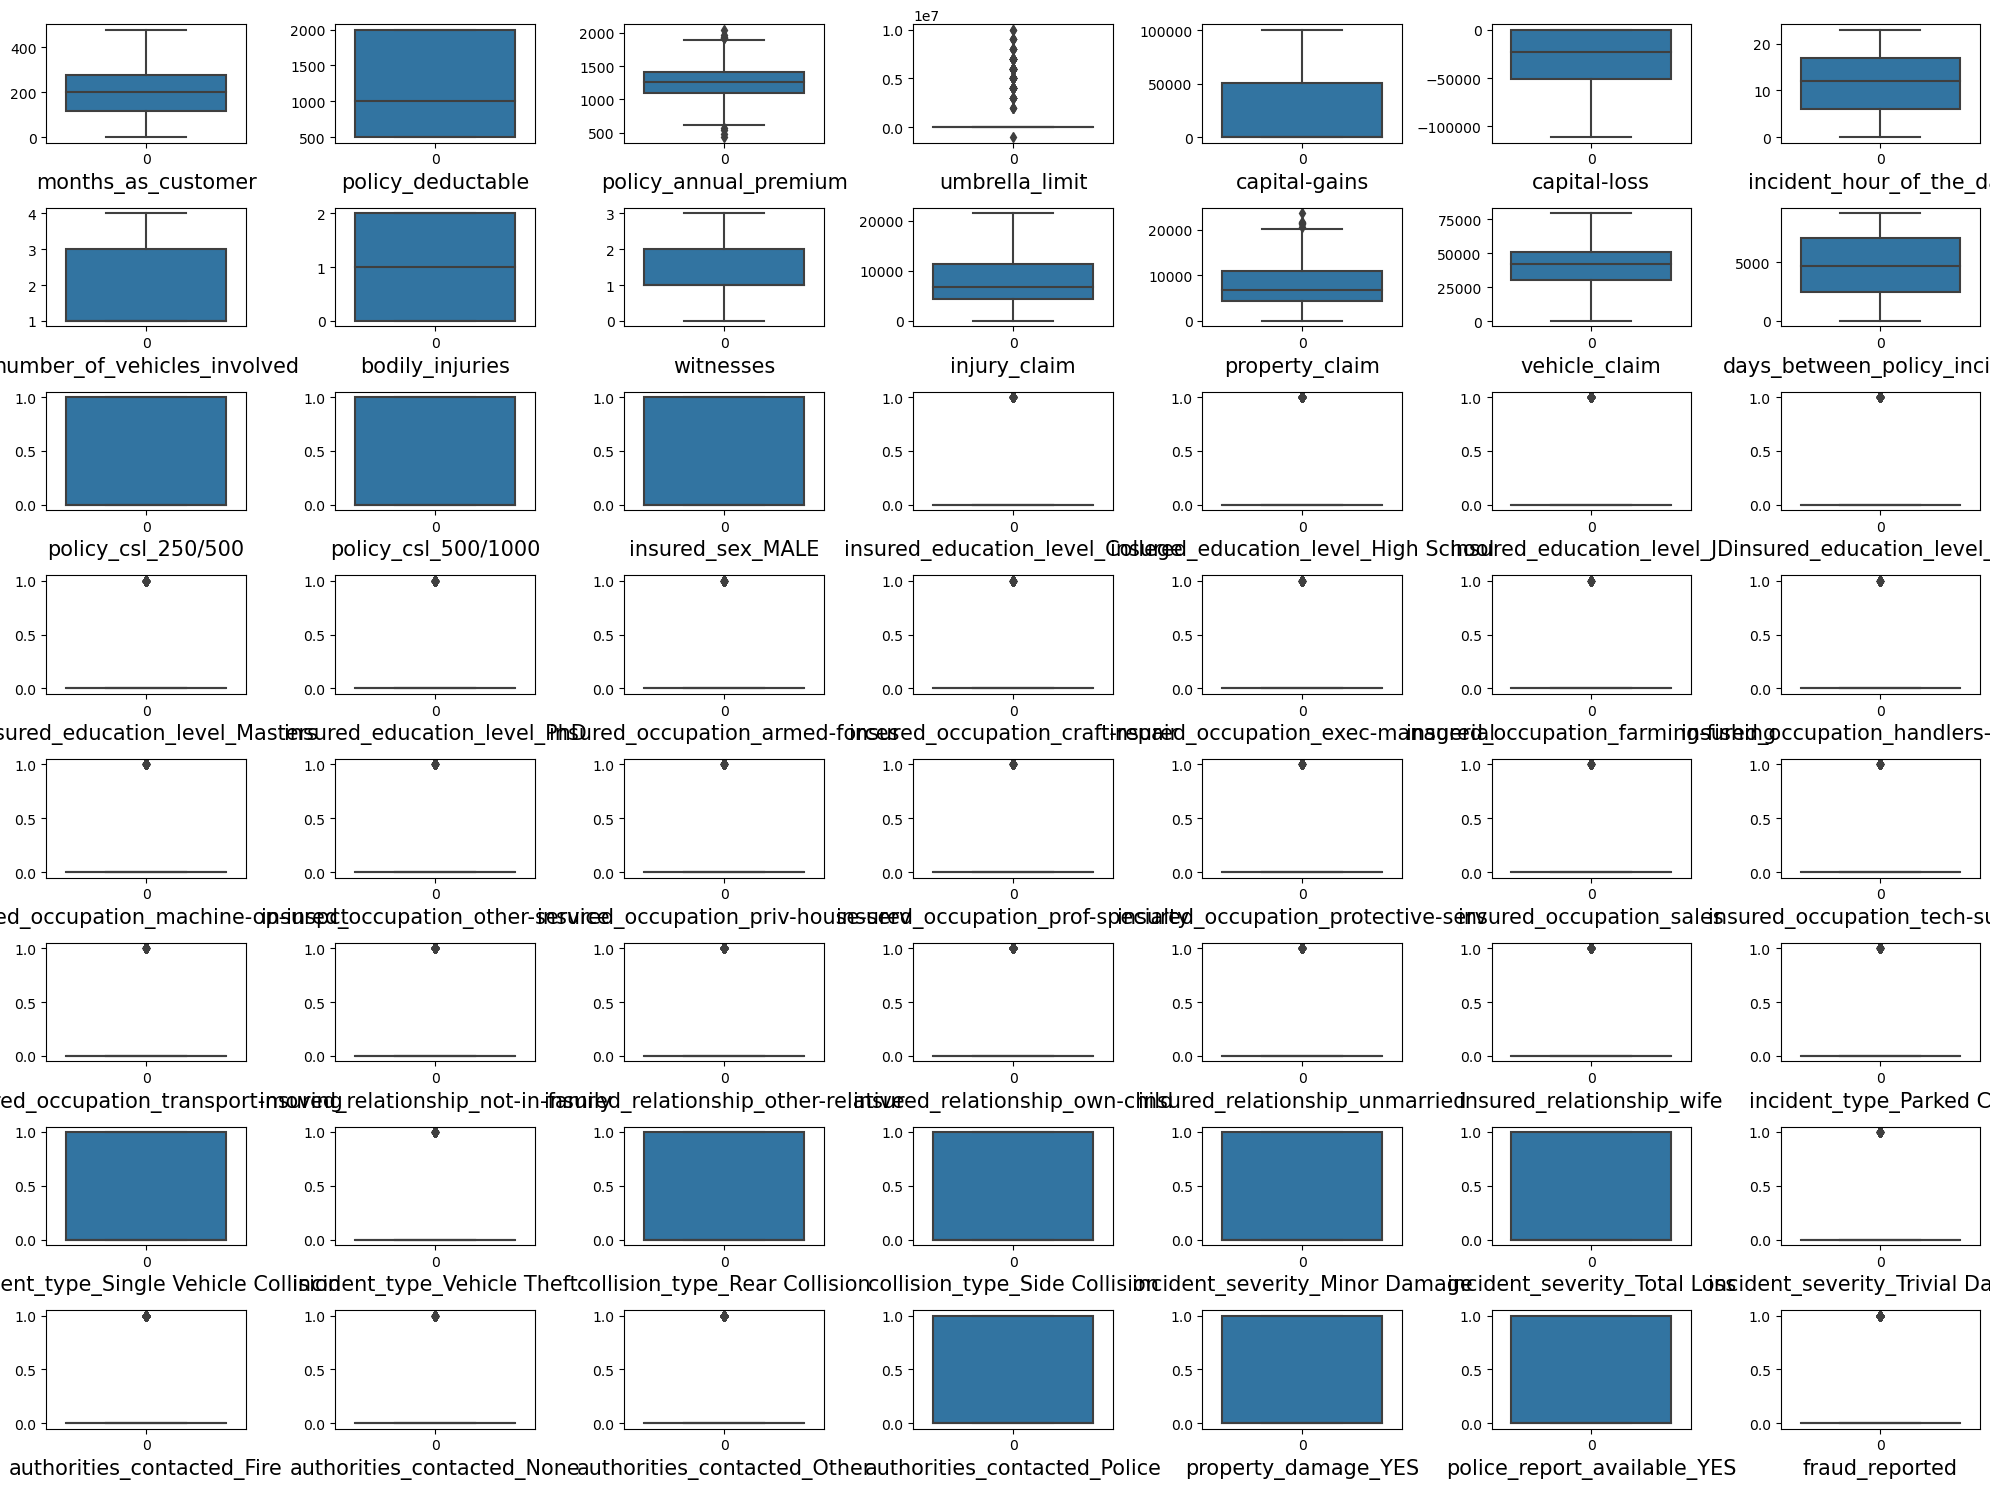

In [250]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in final_df.columns:
    if plotnumber <= 57:
        ax = plt.subplot(8, 7, plotnumber)
        sns.boxplot(final_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [251]:
X=final_df.drop('fraud_reported', axis=1)
y=final_df['fraud_reported']

In [252]:
X

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,...,0,1,0,0,1,0,0,0,1,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,...,0,0,0,0,1,0,0,0,1,0
997,130,500,1383.49,3000000,35100,0,4,3,2,3,...,1,1,0,0,0,0,0,1,0,1
998,458,2000,1356.92,5000000,0,0,2,1,0,1,...,0,0,0,0,0,0,1,0,0,1


# Models

In [253]:
from sklearn.model_selection import train_test_split


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
scaler=StandardScaler()

In [257]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
log_model=LogisticRegression()

In [260]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [261]:
log_model.coef_

array([[-0.06508536,  0.08174072, -0.08295203,  0.19857118, -0.12628125,
         0.02520655, -0.05411471, -0.17692953,  0.11379938,  0.06436982,
        -0.33841245, -0.11036852,  0.3048152 ,  0.01715148,  0.07563551,
        -0.02449647,  0.17388288,  0.1522349 ,  0.07131354,  0.26817256,
         0.18616629,  0.02964885,  0.14715091,  0.01865807,  0.07503775,
         0.15801512,  0.02867939, -0.08801495,  0.01124683, -0.26104476,
        -0.06601192,  0.07125895, -0.07434612,  0.0433322 ,  0.16868266,
         0.10263501,  0.39015201,  0.36781216,  0.01725629,  0.26723605,
         0.21967653,  0.13373343, -0.09683464, -0.01513329,  0.0958268 ,
        -0.12766838, -1.24822224, -1.12391435, -1.08398506, -0.09404071,
        -0.54809923,  0.0738349 , -0.18066851, -0.05385458, -0.02857933]])

In [262]:
y_preds=log_model.predict(X_test)

In [263]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [264]:
confusion_matrix(y_test,y_preds)

array([[208,  26],
       [ 35,  31]], dtype=int64)

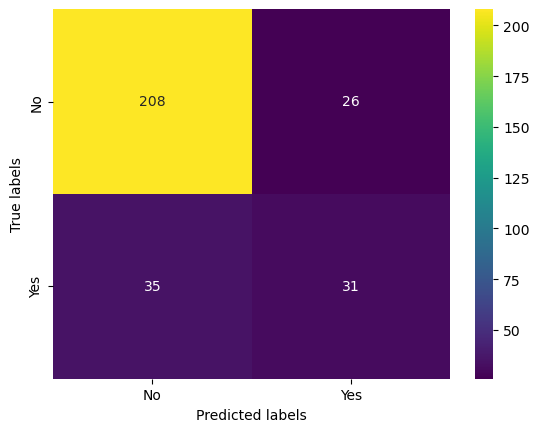

In [265]:
cm = confusion_matrix(y_test, y_preds)
class_labels = ['No', 'Yes']
# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [266]:
log_train_acc = accuracy_score(y_train, rfc.predict(X_train))
log_test_acc = accuracy_score(y_test, y_preds)

print(f"Training accuracy of Logistic Regression is : {log_train_acc}")
print(f"Test accuracy of Logistic Regression is : {log_test_acc}")

print(classification_report(y_test,y_preds))

Training accuracy of Logistic Regression is : 1.0
Test accuracy of Logistic Regression is : 0.7966666666666666
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       234
           1       0.54      0.47      0.50        66

    accuracy                           0.80       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.79      0.80      0.79       300



In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
n_estimators=[64,100,126,200]

In [270]:
max_features=[10,20,30,40,50,56]

In [271]:
bootstrap=[True,False]

In [272]:
oob_score=[True,False]

In [273]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
           'bootstrap':bootstrap,
            'oob_score':oob_score}

In [274]:
rfc=RandomForestClassifier()

In [275]:
grid=GridSearchCV(rfc,param_grid=param_grid)

In [276]:
grid.fit(X_train,y_train)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [10, 20, 30, 40, 50, 56],
                         'n_estimators': [64, 100, 126, 200],
                         'oob_score': [True, False]})

In [277]:
grid.best_params_

{'bootstrap': True,
 'max_features': 40,
 'n_estimators': 126,
 'oob_score': False}

In [278]:
rfc=RandomForestClassifier(max_features=30,n_estimators=100,oob_score=True)

In [279]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=30, oob_score=True)

In [280]:
predictions=rfc.predict(X_test)

In [281]:
rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, predictions)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(classification_report(y_test,predictions))

Training accuracy of Random Forest Classifier is : 1.0
Test accuracy of Random Forest Classifier is : 0.81
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       234
           1       0.58      0.52      0.54        66

    accuracy                           0.81       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.80      0.81      0.81       300



In [282]:
errors=[]
misclassifications=[]

for n in range(1,200):
    rfc=RandomForestClassifier(n_estimators=n,max_features=30)
    rfc.fit(X_train,y_train)
    preds=rfc.predict(X_test)
    err=1-accuracy_score(y_test,preds)
    n_missed=np.sum(preds!=y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

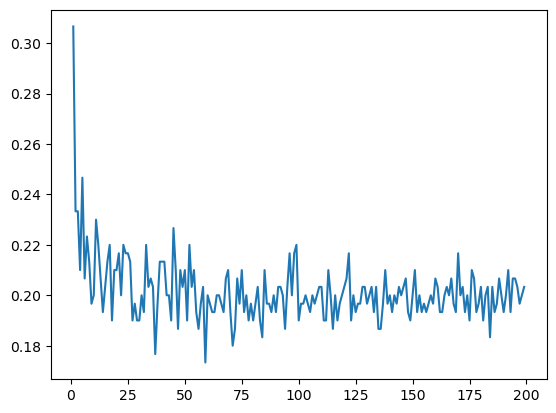

In [283]:
plt.plot(range(1,200),errors)

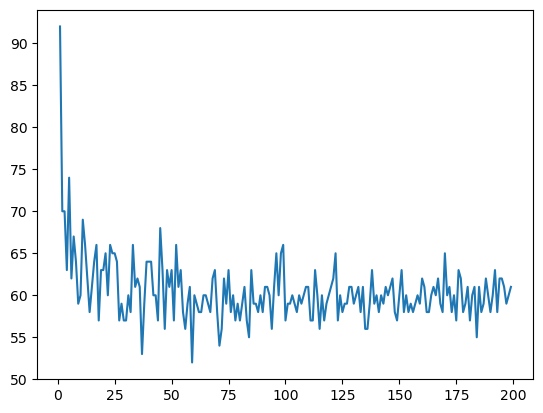

In [284]:
plt.plot(range(1,200),misclassifications);

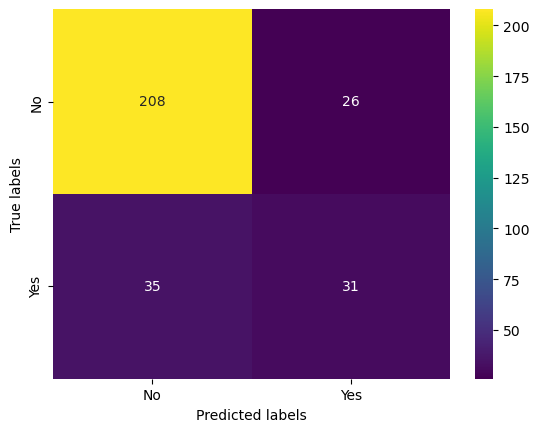

In [285]:
cm = confusion_matrix(y_test, preds)
class_labels = ['No', 'Yes']
# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [286]:
from sklearn.svm import SVC

In [287]:
svc=SVC()

In [288]:
c=[1,2,3,5]
kernel=['poly', 'rbf', 'sigmoid']
degree=[2,3,4,5,6]
gamma=['scale', 'auto']

In [289]:
param_grid={'C':c,
           'kernel': kernel,
           'degree':degree,
           'gamma':gamma}

In [290]:
grid_svc=GridSearchCV(svc,param_grid=param_grid)

In [291]:
grid_svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 5], 'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [292]:
preds=grid_svc.predict(X_test)

In [293]:
svc_train_acc = accuracy_score(y_train, grid_svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, preds)

print(f"Training accuracy of SVC is : {svc_train_acc}")
print(f"Test accuracy of SVC is : {svc_test_acc}")

print(classification_report(y_test,preds))

Training accuracy of SVC is : 0.69
Test accuracy of SVC is : 0.82
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       234
           1       0.59      0.62      0.60        66

    accuracy                           0.82       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.82      0.82      0.82       300



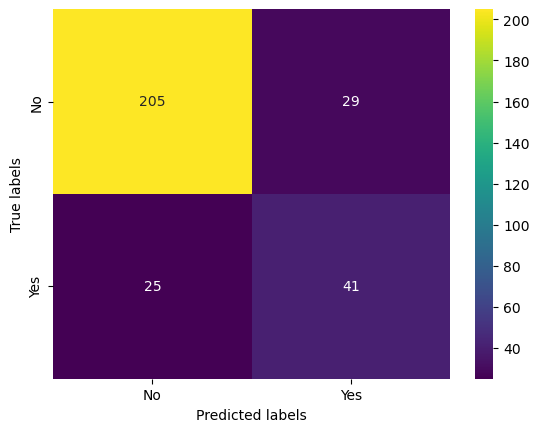

In [294]:
cm = confusion_matrix(y_test, preds)
class_labels = ['No', 'Yes']
# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [295]:
grid_svc.best_params_

{'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [296]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [297]:
ada=AdaBoostClassifier()

In [298]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [299]:
grid=GridSearchCV(ada, parameters,cv = 5, verbose = 1)

In [300]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [301]:
pred=grid.predict(X_test)

In [302]:
ada_train_acc = accuracy_score(y_train, grid.predict(X_train))
ada_test_acc = accuracy_score(y_test, pred)

print(f"Training accuracy of dtc is : {ada_train_acc}")
print(f"Test accuracy of dtc is : {ada_test_acc}")

print(classification_report(y_test,pred))

Training accuracy of dtc is : 0.8228571428571428
Test accuracy of dtc is : 0.8066666666666666
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       234
           1       0.59      0.41      0.48        66

    accuracy                           0.81       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.79      0.81      0.79       300



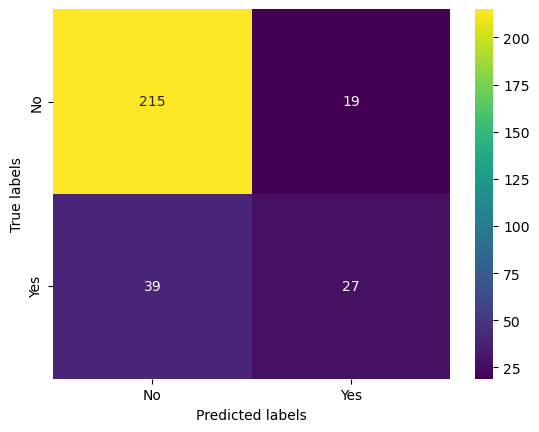

In [303]:
cm = confusion_matrix(y_test, pred)
class_labels = ['No', 'Yes']
# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [304]:
from sklearn.ensemble import GradientBoostingClassifier


In [305]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [306]:
pred=gb.predict(X_test)

In [307]:
gb_train_acc = accuracy_score(y_train, grid.predict(X_train))
gb_test_acc = accuracy_score(y_test, pred)

print(f"Training accuracy of gb is : {gb_train_acc}")
print(f"Test accuracy of gb is : {gb_test_acc}")

print(classification_report(y_test,pred))

Training accuracy of gb is : 0.8228571428571428
Test accuracy of gb is : 0.7833333333333333
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       234
           1       0.51      0.41      0.45        66

    accuracy                           0.78       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.77      0.78      0.77       300



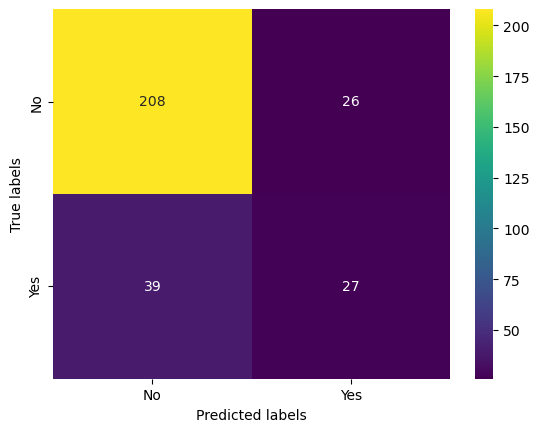

In [308]:
cm = confusion_matrix(y_test, pred)
class_labels = ['No', 'Yes']
# Plotting the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [310]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Random Forest Classifier', 'SVC','Ada Boost', 'Gradient Boost', ],
    'Score' : [log_test_acc, rfc_test_acc, svc_test_acc, ada_test_acc, gb_test_acc,]
})

In [312]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.820000
1,Random Forest Classifier,0.810000
3,Ada Boost,0.806667
0,Logistic Regression,0.796667
4,Gradient Boost,0.783333
